Training on FEN 1: 8/2RK4/8/5k2/8/8/8/8 w - - 0 1
Training completed in 1.64 seconds.
Training on FEN 2: 3K4/8/8/8/8/8/R7/1k6 w - - 0 1
Training completed in 2.12 seconds.
Training on FEN 3: 8/8/1R6/8/2K5/8/8/7k w - - 0 1
Training completed in 1.69 seconds.
Training on FEN 4: 1K6/6R1/8/2k5/8/8/8/8 w - - 0 1
Training completed in 2.15 seconds.
Training on FEN 5: 8/8/R7/8/8/8/4k1K1/8 w - - 0 1
Training completed in 1.87 seconds.
Training on FEN 6: 2K5/8/8/8/8/1k6/2R5/8 w - - 0 1
Training completed in 2.18 seconds.
Training on FEN 7: 8/8/7R/8/8/k7/8/4K3 w - - 0 1
Training completed in 2.60 seconds.
Training on FEN 8: 8/6K1/1R6/8/8/2k5/8/8 w - - 0 1
Training completed in 2.34 seconds.
Training on FEN 9: 8/2K5/8/8/4R3/8/8/7k w - - 0 1
Training completed in 2.75 seconds.
Training on FEN 10: 1k6/8/8/4K3/8/8/4R3/8 w - - 0 1
Training completed in 2.02 seconds.
Training on FEN 11: 8/8/k3K3/8/8/3R4/8/8 w - - 0 1
Training completed in 2.29 seconds.
Training on FEN 12: 7k/8/8/8/8/1K6/8/2R5 w - - 0 

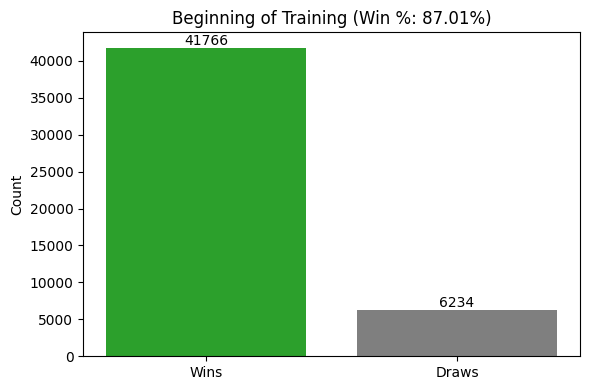

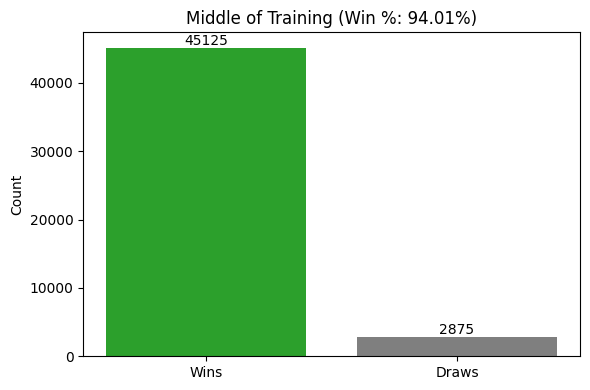

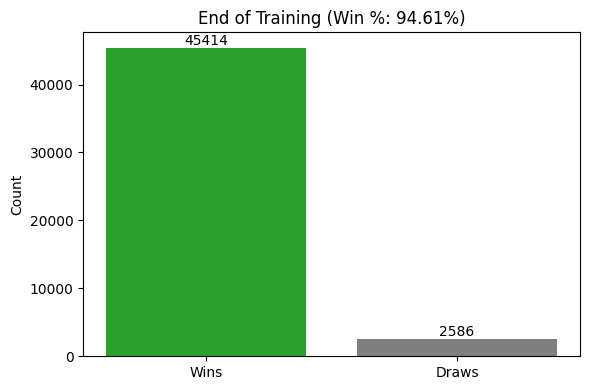

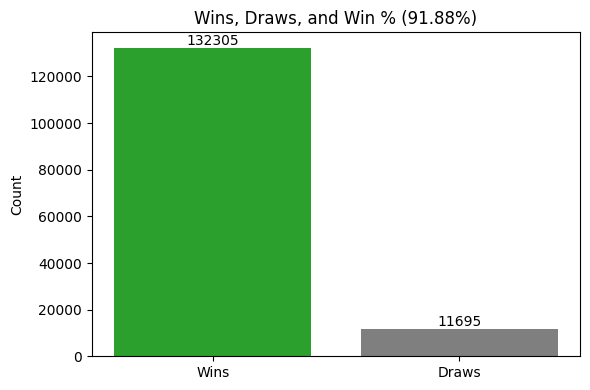

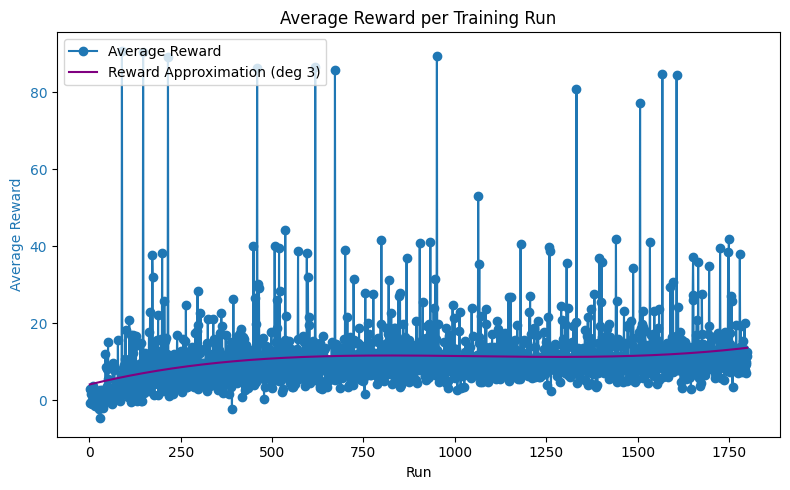

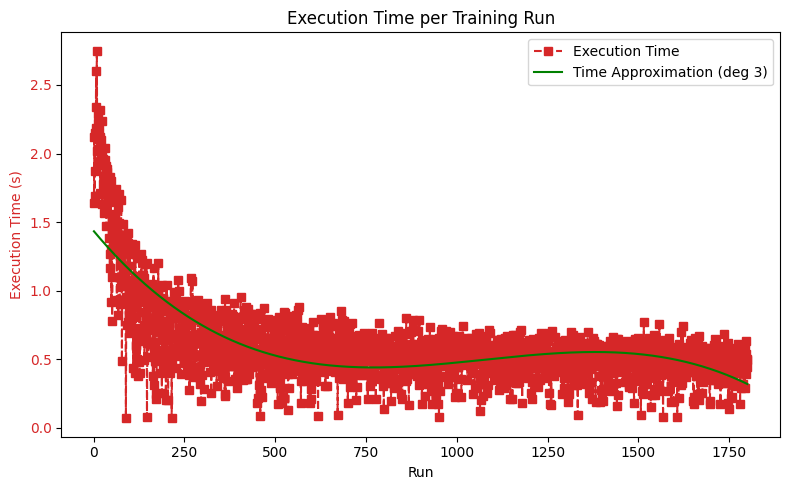

Training completed and Q-table saved.


In [4]:

from training_qtable_random import QTableTrainer, plot_avg_reward_and_time, plot_training_results
from states.QTable import QTable
from states.state_KRvsk import State



# Test for QTableTrainer training
if __name__ == "__main__":
    qtable = QTable()
    trainer = QTableTrainer(qtable=qtable, epsilon_start=0.2, epsilon_decay=0.999, alpha=0.5, gamma=0.6, min_epsilon=0.1)

    trained_fens = []
    list_of_times = []
    list_of_results = []
    num_random_fens = 1800
    episodes_per_fen = 80

    try:
        for i in range(num_random_fens):
            fen = State.random_kr_vs_k_fen()
            print(f"Training on FEN {i+1}: {fen}")
            trained_bool, episode_results, time = trainer.train(episodes=episodes_per_fen, initial_fen=fen)
            if trained_bool:
                print(f"  Successfully trained on FEN: {fen}")
                # Record all symmetric FENs
                for sym_fen, sym_action in State.fen_action_symmetries(fen, None):
                    trained_fens.append(sym_fen)
            #plot_training_results(episode_results)
            list_of_times.append(time)
            list_of_results.append(episode_results)

    except KeyboardInterrupt:
        print("Training interrupted by user.")
    finally:
        # Plot average reward and time
        plot_avg_reward_and_time(list_of_results, list_of_times)
        
        # Save the Q-table regardless of interruption
        trainer.save_qtable("results", "test_trained_qtable.json")
        print("Training completed and Q-table saved.")